In [35]:
# importing libraries
import numpy as np            # data science essentials
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling
import sklearn.linear_model # linear models
from sklearn.model_selection import train_test_split # train/test split
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.neighbors import KNeighborsRegressor # KNN Regression
from sklearn.ensemble import GradientBoostingRegressor # Gradient Bossting Regression
from sklearn.ensemble import RandomForestRegressor # RandomForestRegressor
from sklearn.model_selection import GridSearchCV # CV using Grid Search



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
original_df = pd.read_excel(file)

In [36]:
# displaying the first rows of the DataFrame
original_df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253


In [37]:
# Missing Value Analysis
original_df.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

In [38]:
# creating a dropped dataset 
original_df = original_df.dropna()

original_df.isnull().sum().sum()

original_df.to_excel("original_df_without_na.xlsx", index = False)

In [40]:
# splitting emails

# safety measure in case of multiple concatenations
original_df = pd.read_excel('original_df_without_na.xlsx')

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

In [43]:
# concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, email_df['email_domain']],
                     axis = 1)

In [45]:
# email domain types
personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains  = ['@me.com', '@aol.com', '@hotmail.com',
                       '@live.com', '@msn.com', '@passport.com']
prof_email_domains  = ['@mmm.com', '@amex.com', '@apple.com',
                       '@boeing.com', '@caterpillar.com', '@chevron.com',
                       '@cisco.com', '@cocacola.com', '@disney.com', 
                       '@dupont.com', '@exxon.com', '@ge.org', 
                       '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                       '@intel.com', '@jnj.com', '@jpmorgan.com', 
                       '@mcdonalds.com', '@merck.com', '@microsoft.com', 
                       '@nike.com', '@pfizer.com', '@pg.com', 
                       '@travelers.com', '@unitedtech.com', '@unitedhealth.com',
                       '@verizon.com', '@visa.com', '@walmart.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in original_df['email_domain']:
    
    if '@' + str(domain) in personal_email_domains:
        placeholder_lst.append('personal')
        

    elif '@' + str(domain) in junk_email_domains:
        placeholder_lst.append('junk')
        
        
    elif '@' + str(domain) in prof_email_domains:
        placeholder_lst.append('professional')


    else:
        print('Unknown')


# concatenating with original DataFrame
original_df['domain_group'] = pd.Series(placeholder_lst)


# checking results
original_df['domain_group'].value_counts()

personal        845
professional    678
junk            376
Name: domain_group, dtype: int64

In [46]:
# get dummies for domain group
dummies = pd.get_dummies(original_df['domain_group'])

# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, dummies],
                     axis = 1)

# verifying
original_df.head()

# converting the dummies to int64
original_df['junk'] = np.int64(original_df['junk'])
original_df['personal'] = np.int64(original_df['personal'])
original_df['professional'] = np.int64(original_df['professional'])

In [60]:
# creating new column for revenue per order

original_df['revenue_per_order'] = original_df['REVENUE'] / original_df['TOTAL_MEALS_ORDERED']

# creating new variable for whether customer orders drinks

original_df['drink_ordered'] = [1 if x > 23 else 0 for x in original_df['revenue_per_order']] 

# Target variable as log
original_df['log_REVENUE'] = np.log(original_df['REVENUE'])

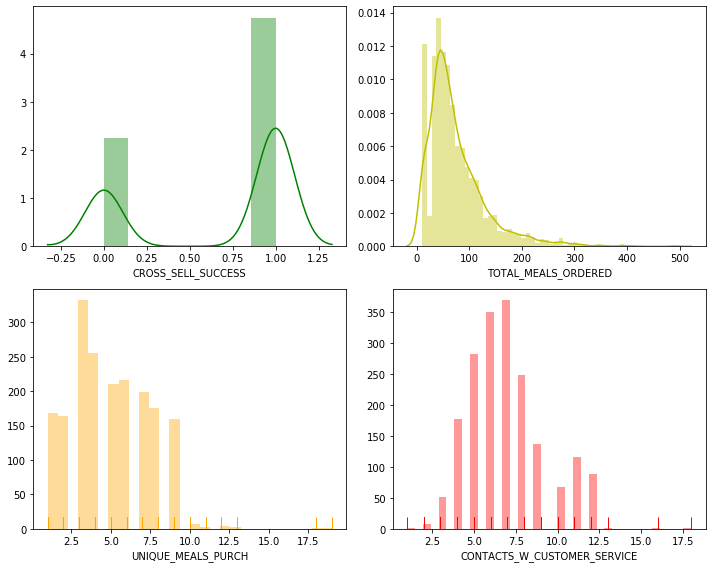

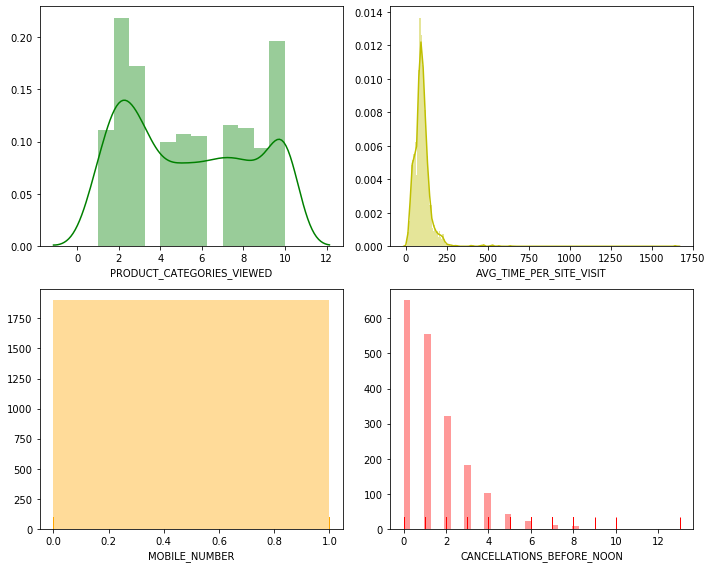

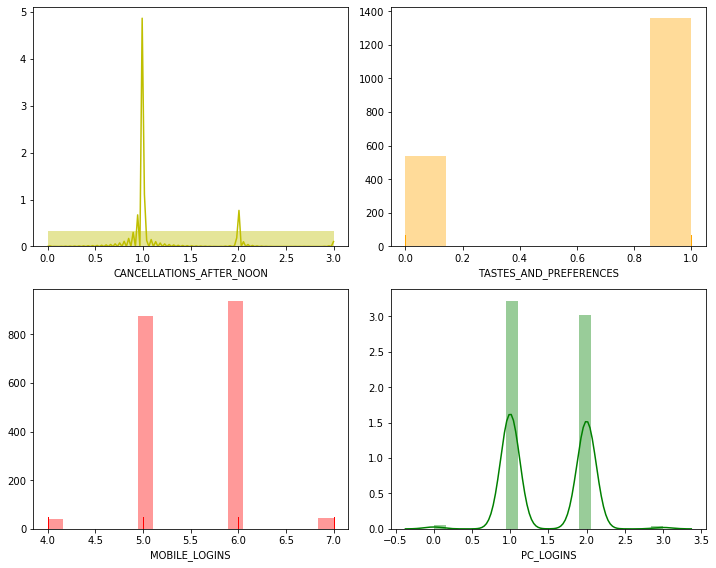

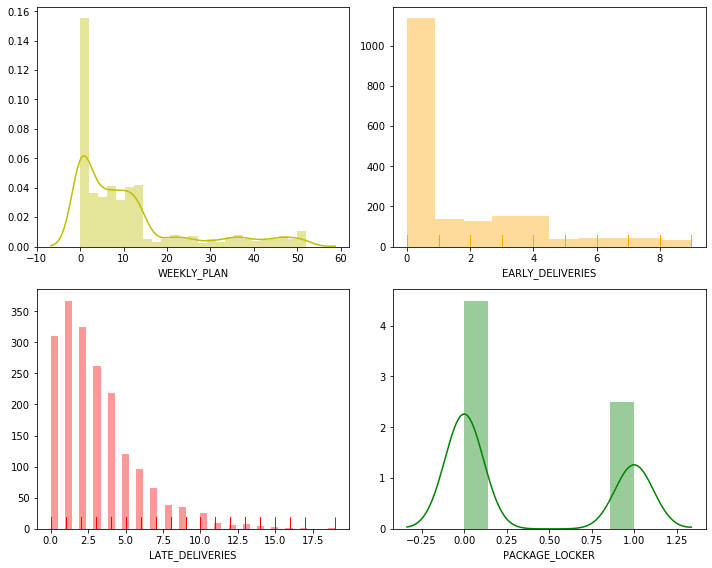

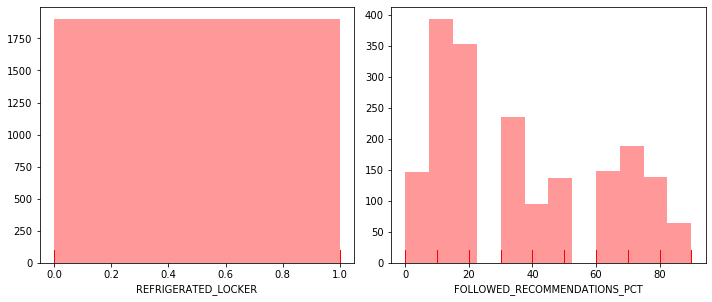

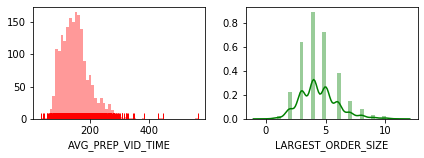

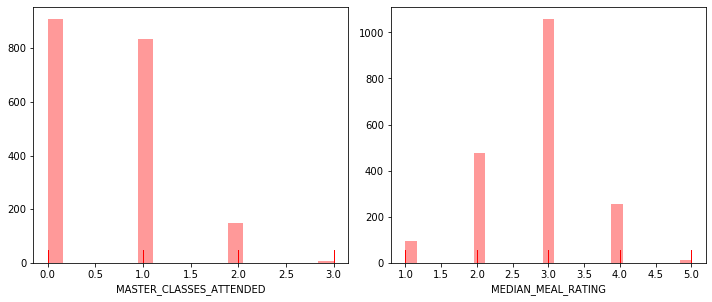

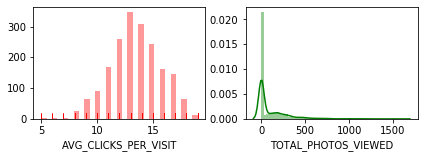

In [50]:
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_NUMBER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')
plt.tight_layout()
plt.show()

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')
plt.tight_layout()
plt.show()

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()

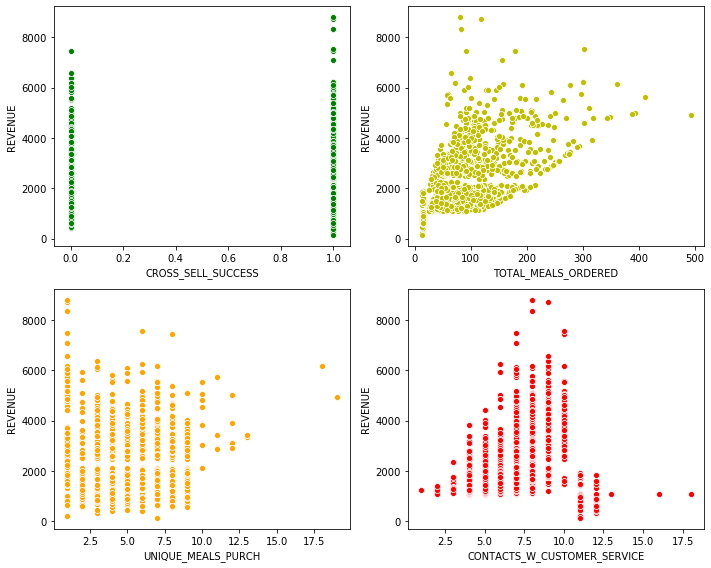

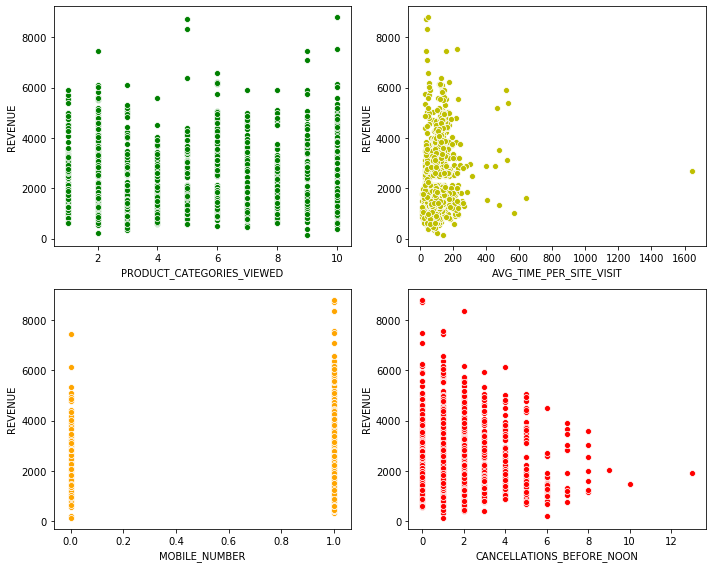

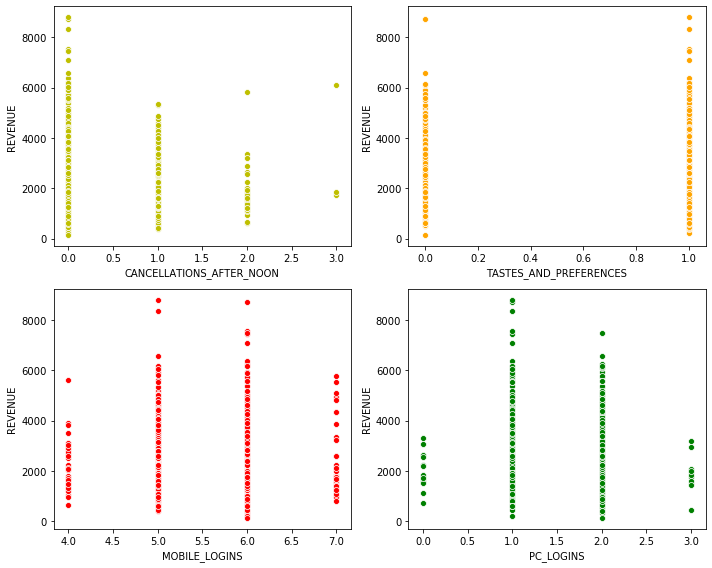

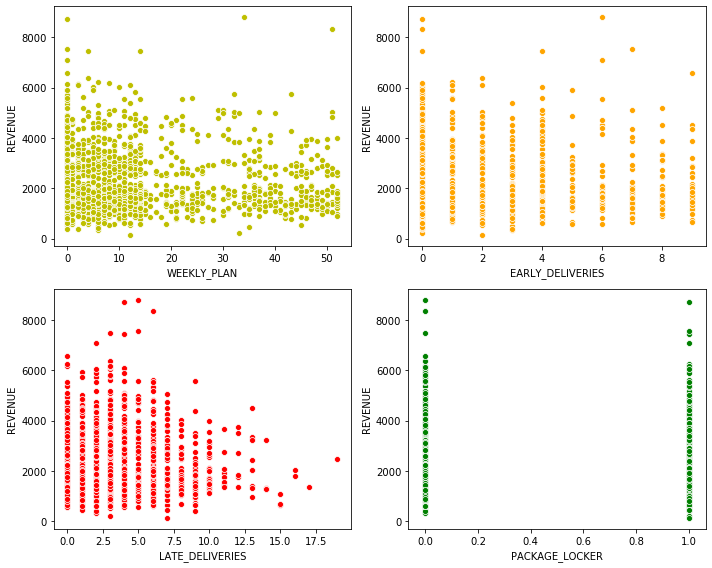

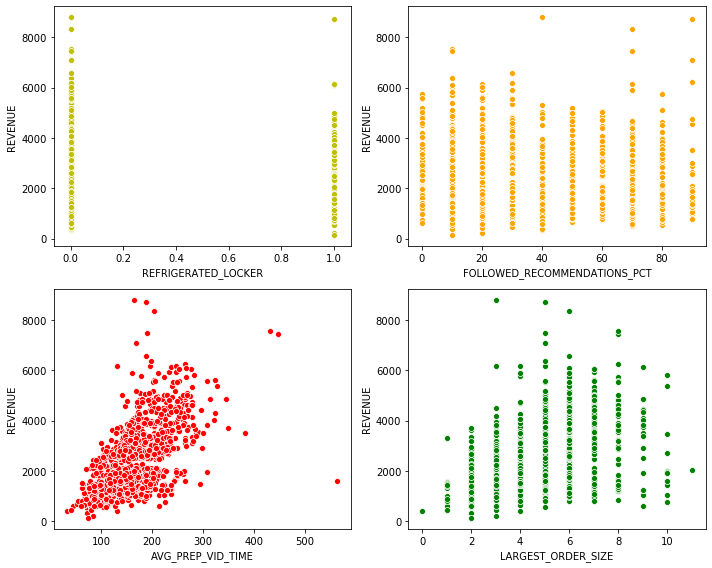

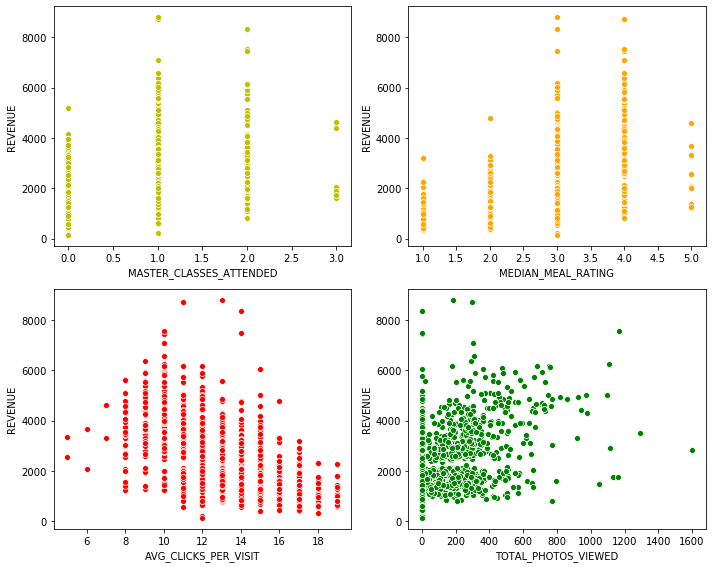

In [51]:
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['CROSS_SELL_SUCCESS'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['MOBILE_NUMBER'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TASTES_AND_PREFERENCES'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['MOBILE_LOGINS'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PC_LOGINS'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['WEEKLY_PLAN'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PACKAGE_LOCKER'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['REFRIGERATED_LOCKER'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()

########################
########################

In [52]:
# setting outlier thresholds - data
TOTAL_MEALS_ORDERED_hi           = 280
UNIQUE_MEALS_PURCH_hi            = 9
CONTACTS_W_CUSTOMER_SERVICE_lo   = 2.5
CONTACTS_W_CUSTOMER_SERVICE_hi   = 10
AVG_TIME_PER_SITE_VISIT_hi       = 250
CANCELLATIONS_BEFORE_NOON_hi     = 7
CANCELLATIONS_AFTER_NOON_hi      = 1.5
MOBILE_LOGINS_hi                 = 6.5
MOBILE_LOGINS_lo                 = 4.5
PC_LOGINS_hi                     = 2.5
PC_LOGINS_lo                     = 0.5
WEEKLY_PLAN_hi                   = 20
EARLY_DELIVERIES_hi              = 5
LATE_DELIVERIES_hi               = 10
AVG_PREP_VID_TIME_hi             = 300
LARGEST_ORDER_SIZE_hi            = 6
MASTER_CLASSES_ATTENDED_hi       = 2
MEDIAN_MEAL_RATING_hi            = 4.5 
AVG_CLICKS_PER_VISIT_lo          = 7.5
TOTAL_PHOTOS_VIEWED_hi           = 470

# setting outlier thresholds - target
REVENUE_hi                       = 5500



##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# TOTAL_MEALS_ORDERED
original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# UNIQUE_MEALS_PURCH
original_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_BEFORE_NOON
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_AFTER_NOON
original_df['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# MOBILE_LOGINS
original_df['out_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_hi]
condition_lo = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_lo]

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# PC_LOGINS
original_df['out_PC_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] > PC_LOGINS_hi]
condition_lo = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] < PC_LOGINS_lo]

original_df['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_PC_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# WEEKLY_PLAN
original_df['out_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'out_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# EARLY_DELIVERIES
original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# LATE_DELIVERIES
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# AVG_PREP_VID_TIME
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# LARGEST_ORDER_SIZE
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# MASTER_CLASSES_ATTENDED
original_df['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = original_df.loc[0:,'out_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

original_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# MEDIAN_MEAL_RATING
original_df['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = original_df.loc[0:,'out_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# AVG_CLICKS_PER_VISIT
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)


# TOTAL_PHOTOS_VIEWED
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# REVENUE
original_df['out_REVENUE'] = 0
condition_hi = original_df.loc[0:,'out_REVENUE'][original_df['REVENUE'] > REVENUE_hi]

original_df['out_REVENUE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

In [53]:
# setting trend-based thresholds
TOTAL_PHOTOS_VIEWED_change_at = 0 # zero inflated
CONTACTS_W_CUSTOMER_SERVICE_change_hi  = 10 # trend changes above this point
MEDIAN_MEAL_RATING_change_at_3 = 3 # inflated
MEDIAN_MEAL_RATING_change_at_4 = 4 # inflated
LARGEST_ORDER_SIZE_change_hi = 8 # trend changes above this point
TOTAL_MEALS_ORDERED_change_hi = 25 # trend changes


# TOTAL_PHOTOS_VIEWED
original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_change_at]

original_df['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)

# MEDIAN_MEAL_RATING_change_at_3
original_df['change_MEDIAN_MEAL_RATING_3'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING_3'][original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_change_at_3]

original_df['change_MEDIAN_MEAL_RATING_3'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# MEDIAN_MEAL_RATING_change_at_4
original_df['change_MEDIAN_MEAL_RATING_4'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING_4'][original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_change_at_4]

original_df['change_MEDIAN_MEAL_RATING_4'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)

# LARGEST_ORDER_SIZE
original_df['change_LARGEST_ORDER_SIZE'] = 0

condition = original_df.loc[0:,'change_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_change_hi]

original_df['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

# TOTAL_MEALS_ORDERED
original_df['change_TOTAL_MEALS_ORDERED'] = 0

condition = original_df.loc[0:,'change_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_change_hi]

original_df['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0

condition = original_df.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_change_hi]

original_df['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

In [54]:
# saving feature-rich dataset in Excel
original_df.to_excel('original_df_feature_rich.xlsx',
                 index = False)

In [112]:
# declaring set of x-variables (NEW3)
x_var = ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
         'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
         'TOTAL_PHOTOS_VIEWED','out_TOTAL_MEALS_ORDERED','out_UNIQUE_MEALS_PURCH',
         'out_CONTACTS_W_CUSTOMER_SERVICE', 'out_CANCELLATIONS_AFTER_NOON',
         'out_AVG_PREP_VID_TIME','change_CONTACTS_W_CUSTOMER_SERVICE',
         'drink_ordered','change_MEDIAN_MEAL_RATING_3', 'revenue_per_order',
         'change_MEDIAN_MEAL_RATING_4', 'change_TOTAL_MEALS_ORDERED']

In [113]:
# Preparing a DataFrame to scale the data and use for train/test split
chef_data   = original_df.loc[ : , x_var]


# Preparing the target variable
chef_target = np.log(original_df.loc[:, 'REVENUE'])

In [114]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(chef_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# renaming column to concatenate
X_scaled_df.columns = ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                       'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
                       'TOTAL_PHOTOS_VIEWED','out_TOTAL_MEALS_ORDERED','out_UNIQUE_MEALS_PURCH',
                       'out_CONTACTS_W_CUSTOMER_SERVICE', 'out_CANCELLATIONS_AFTER_NOON',
                       'out_AVG_PREP_VID_TIME','change_CONTACTS_W_CUSTOMER_SERVICE',
                       'drink_ordered','change_MEDIAN_MEAL_RATING_3', 'revenue_per_order',
                       'change_MEDIAN_MEAL_RATING_4', 'change_TOTAL_MEALS_ORDERED']

# checking the results
X_scaled_df.describe().round(2)

,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,TOTAL_PHOTOS_VIEWED,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEALS_PURCH,out_CONTACTS_W_CUSTOMER_SERVICE,out_CANCELLATIONS_AFTER_NOON,out_AVG_PREP_VID_TIME,change_CONTACTS_W_CUSTOMER_SERVICE,drink_ordered,change_MEDIAN_MEAL_RATING_3,revenue_per_order,change_MEDIAN_MEAL_RATING_4,change_TOTAL_MEALS_ORDERED
count,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00
mean,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.15,-1.56,-2.63,-2.36,-2.84,-0.94,-0.59,-0.10,-0.10,-0.36,-0.15,-0.09,-0.35,-1.65,-1.12,-1.39,-0.39,-2.84
25%,-0.65,-0.76,-0.87,-0.73,-0.92,-0.94,-0.59,-0.10,-0.10,-0.36,-0.15,-0.09,-0.35,-1.65,-1.12,-0.74,-0.39,0.35
50%,-0.27,0.04,0.01,-0.10,-0.28,0.61,-0.59,-0.10,-0.10,-0.36,-0.15,-0.09,-0.35,0.60,0.89,-0.15,-0.39,0.35
75%,0.37,0.84,0.45,0.47,0.36,0.61,0.38,-0.10,-0.10,-0.36,-0.15,-0.09,-0.35,0.60,0.89,0.45,-0.39,0.35
max,7.55,5.63,4.85,8.31,4.20,3.72,8.27,10.52,9.95,2.79,6.82,11.21,2.86,0.60,0.89,6.08,2.54,0.35


In [115]:
# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            chef_target,
            test_size = 0.25,
            random_state = 222)

In [116]:
# making a copy of X_scaled_df
chef_explanatory = X_scaled_df.copy()


# formatting each explanatory variable for statsmodels
for val in chef_explanatory:
    print(f"original_df['{val}'] +")

original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['out_TOTAL_MEALS_ORDERED'] +
original_df['out_UNIQUE_MEALS_PURCH'] +
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['out_CANCELLATIONS_AFTER_NOON'] +
original_df['out_AVG_PREP_VID_TIME'] +
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['drink_ordered'] +
original_df['change_MEDIAN_MEAL_RATING_3'] +
original_df['revenue_per_order'] +
original_df['change_MEDIAN_MEAL_RATING_4'] +
original_df['change_TOTAL_MEALS_ORDERED'] +


In [117]:
# building a ols stat model

# blueprinting a model type
lm_full = smf.ols(formula = """original_df['log_REVENUE'] ~ original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['out_TOTAL_MEALS_ORDERED'] +
original_df['out_UNIQUE_MEALS_PURCH'] +
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['out_CANCELLATIONS_AFTER_NOON'] +
original_df['out_AVG_PREP_VID_TIME'] +
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['drink_ordered'] +
original_df['change_MEDIAN_MEAL_RATING_3'] +
original_df['revenue_per_order'] +
original_df['change_MEDIAN_MEAL_RATING_4'] +
original_df['change_TOTAL_MEALS_ORDERED']""",
                               data = original_df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     original_df['log_REVENUE']   R-squared:                       0.911
Model:                                    OLS   Adj. R-squared:                  0.910
Method:                         Least Squares   F-statistic:                     1068.
Date:                        Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                                22:39:58   Log-Likelihood:                 961.80
No. Observations:                        1899   AIC:                            -1886.
Df Residuals:                            1880   BIC:                            -1780.
Df Model:                                  18                                         
Covariance Type:                    nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             5.7576      0.077     74.950      0.000       5.607       5.908
original_df['TOTAL_MEALS_ORDERED']                    0.0066      0.000     50.639      0.000       0.006       0.007
original_df['UNIQUE_MEALS_PURCH']                    -0.0084      0.001     -5.737      0.000      -0.011      -0.006
original_df['CONTACTS_W_CUSTOMER_SERVICE']            0.0245      0.003      9.718      0.000       0.020       0.029
original_df['AVG_PREP_VID_TIME']                      0.0018      0.000     11.931      0.000       0.001       0.002
original_df['LARGEST_ORDER_SIZE']                    -0.0175      0.004     -4.651      0.000      -0.025      -0.010
original_df['MASTER_CLASSES_ATTENDED']                0.0318      0.006      5.157      0.000       0.020       0.044
original_df['TOTAL_PHOTOS_VIEWED']                  4.32e-05    2.2e-05      1.964      0.050    6.18e-08    8.63e-05
original_df['out_TOTAL_MEALS_ORDERED']               -0.7000      0.042    -16.553      0.000      -0.783      -0.617
original_df['out_UNIQUE_MEALS_PURCH']                -0.2330      0.038     -6.082      0.000      -0.308      -0.158
original_df['out_CONTACTS_W_CUSTOMER_SERVICE']        0.0435      0.050      0.869      0.385      -0.055       0.142
original_df['out_CANCELLATIONS_AFTER_NOON']          -0.0338      0.024     -1.435      0.151      -0.080       0.012
original_df['out_AVG_PREP_VID_TIME']                 -0.1489      0.042     -3.538      0.000      -0.231      -0.066
original_df['change_CONTACTS_W_CUSTOMER_SERVICE']    -0.6972      0.093     -7.499      0.000      -0.880      -0.515
original_df['drink_ordered']                          0.1711      0.012     14.483      0.000       0.148       0.194
original_df['change_MEDIAN_MEAL_RATING_3']            0.0808      0.009      9.346      0.000       0.064       0.098
original_df['revenue_per_order']                      0.0153      0.000     49.816      0.000       0.015       0.016
original_df['change_MEDIAN_MEAL_RATING_4']            0.2005      0.015     13.374      0.000       0.171       0.230
original_df['change_TOTAL_MEALS_ORDERED']             0.2953      0.074      3.991      0.000       0.150       0.440
==============================================================================
Omnibus:                      152.436   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.208
Skew:                          -0.564   Prob(JB):                     4.72e-60
Kurtosis:                       4.477   Cond. No.                     9.87e+03
====

In [118]:
# Linear Model
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

Training Score: 0.9107
Testing Score: 0.9095


In [119]:
# Ridge Model with CV and parameter tuning (alpha)
# INSTANTIATING a model object
ridge_model = sklearn.linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10], cv=3)

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))
print('Alpha:', ridge_model.alpha_)

# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

Training Score: 0.9106
Testing Score: 0.9098
Alpha: 1.0


In [120]:
# Elastic Model with CV = 3
# INSTANTIATING a model object
elastic_model = sklearn.linear_model.ElasticNetCV(cv=3)

# FITTING the training data
elastic_fit = elastic_model.fit(X_train, y_train)


# PREDICTING on new data
elastic_pred = elastic_model.predict(X_test)

print('Training Score:', elastic_model.score(X_train, y_train).round(4))
print('Testing Score:',  elastic_model.score(X_test, y_test).round(4))

# saving scoring data for future use
elastic_train_score = elastic_model.score(X_train, y_train).round(4)
elastic_test_score  = elastic_model.score(X_test, y_test).round(4)

Training Score: 0.9106
Testing Score: 0.91


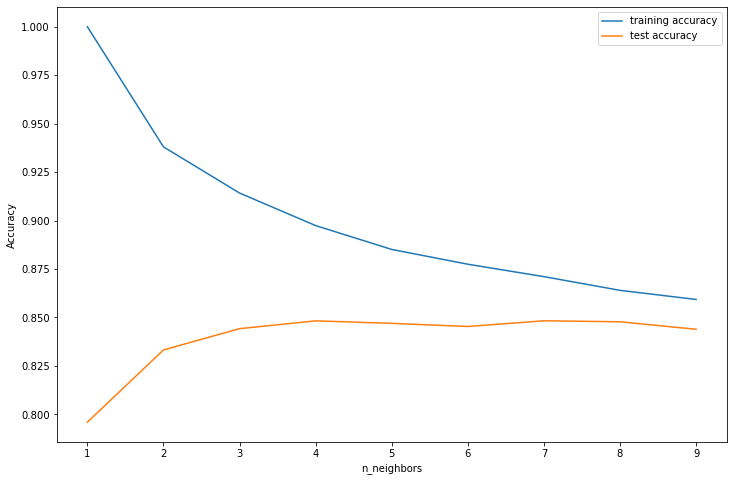

The optimal number of neighbors is 7
Training Score: 0.8711
Testing Score: 0.8483


In [121]:
# KNN Model

# First part to find optimal k

# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 10 neighbors
neighbors_settings = range(1, 10)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

# second part - model

# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_test)



# SCORING the results
print('Training Score:', knn_opt.score(X_train, y_train).round(4))
print('Testing Score:',  knn_opt.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(X_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(X_test, y_test).round(4)

In [122]:
# Gradient Boosting Model
# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=2, random_state=222)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
gbt_pred = gbt.predict(X_test)

print('Training Score:', gbt.score(X_train, y_train).round(4))
print('Testing Score:',  gbt.score(X_test, y_test).round(4))


# saving scoring data for future use
gbt_train_score = gbt.score(X_train, y_train).round(4)
gbt_test_score  = gbt.score(X_test, y_test).round(4)

Training Score: 0.9905
Testing Score: 0.9786


In [123]:
# Random Forrent Model
# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state= 222)

# Fit 'grid_rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels
rf_pred = rf.predict(X_test)

print('Training Score:', rf.score(X_train, y_train).round(4))
print('Testing Score:',  rf.score(X_test, y_test).round(4))


# saving scoring data for future use
rf_train_score = rf.score(X_train, y_train).round(4)
rf_test_score  = rf.score(X_test, y_test).round(4)

Training Score: 0.9949
Testing Score: 0.9728


In [127]:
# Model Performance

print(f"""
Model                 Train Score      Test Score
----------------      ----------       ----------
Linear                {lr_train_score}           {lr_test_score}
Ridge                 {ridge_train_score}           {ridge_test_score}
ElasticNet            {elastic_train_score}           {elastic_test_score}
KNN                   {knn_opt_score_train}           {knn_opt_score_test}
Gradient Bossting     {gbt_train_score}           {gbt_test_score}
Random Forrest        {rf_train_score}           {rf_test_score}

OLS R-Squared = 0.911

Gradient & RF model have over-fitting.
The best model is Elastic Model.

""")


Model                 Train Score      Test Score
----------------      ----------       ----------
Linear                0.9107           0.9095
Ridge                 0.9106           0.9098
ElasticNet            0.9106           0.91
KNN                   0.8711           0.8483
Gradient Bossting     0.9905           0.9786
Random Forrest        0.9949           0.9728

OLS R-Squared = 0.911

Gradient & RF model have over-fitting.
The best model is Elastic Model.


